In [2]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
testing=ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory("ML Projects/Training/", target_size=(200,200),
batch_size=3,class_mode="binary")

validation_dataset=validation.flow_from_directory("ML Projects/Validation/", target_size=(200,200),
batch_size=3,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 880 images belonging to 2 classes.


In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(512,activation='relu'),
    #
    tf.keras.layers.Dense(1,activation='sigmoid')

])



In [8]:
model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=35,validation_data=validation_dataset)


Epoch 1/35
2/3 [===================>..........] - ETA: 0s - loss: 0.0173 - acc: 1.0000

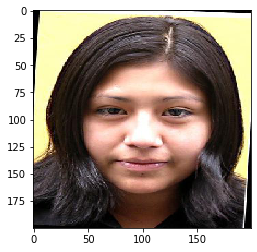

Without Mask


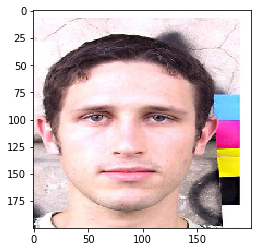

Without Mask


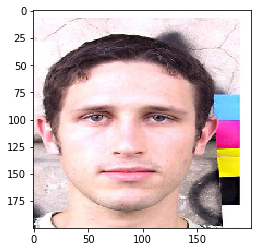

Without Mask


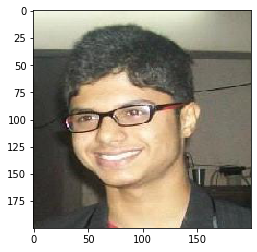

Without Mask


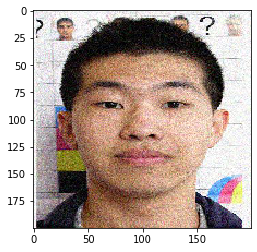

Without Mask


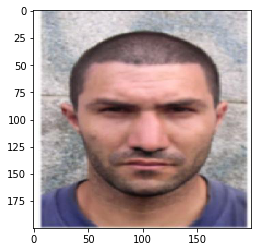

Without Mask


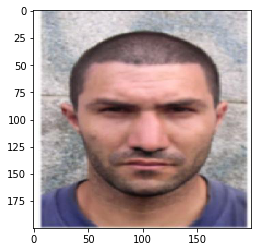

Without Mask


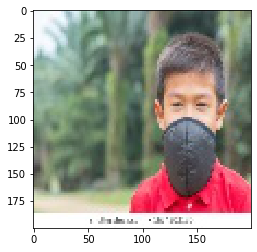

Without Mask


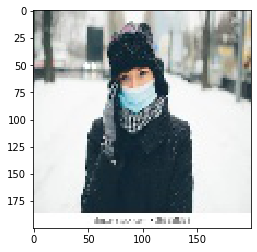

With Mask


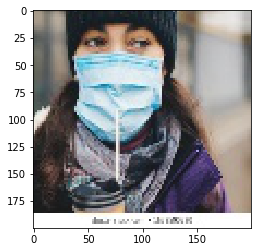

With Mask


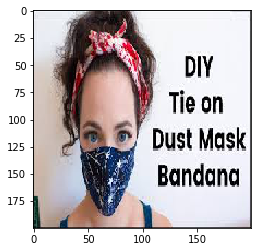

With Mask


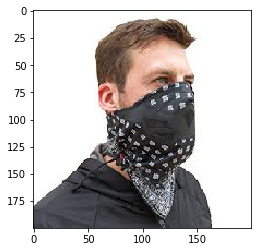

With Mask


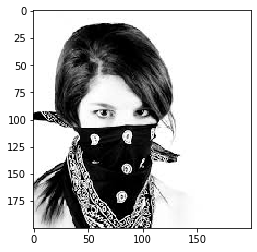

Without Mask


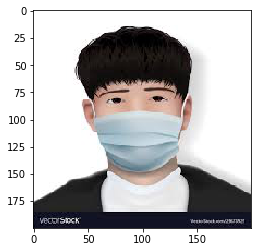

With Mask


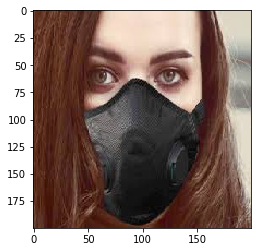

With Mask


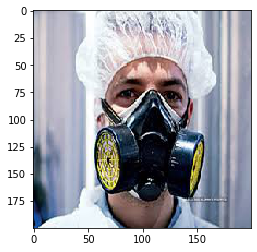

Without Mask


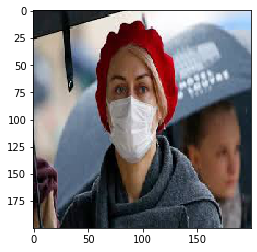

With Mask


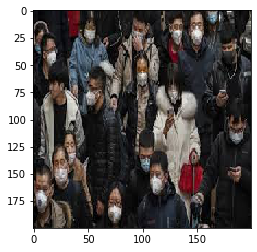

Without Mask


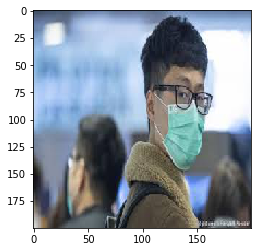

Without Mask


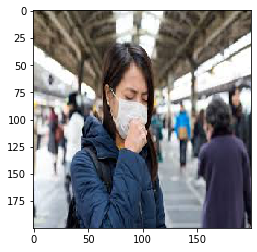

With Mask


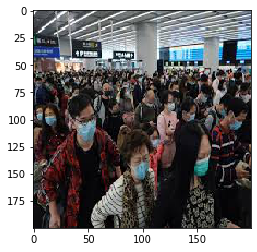

Without Mask


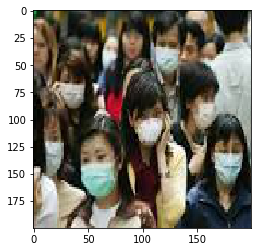

Without Mask


In [10]:
test_path="ML Projects/Test"
for i in os.listdir(test_path):
    img=image.load_img(test_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if(val==0):
        print("With Mask")
    else:
        print("Without Mask")
